In [1]:
import pandas as pd

In [2]:
pd.Timedelta('0 days 7 hours')

Timedelta('0 days 07:00:00')

# Do some statistic with dataset 1


In [3]:
import pandas as pd
df_9_ex = pd.read_excel("/kaggle/input/weather/data_match9.xlsx").dropna()
df_9_ex.head(3)

,id,name,lat,lon,value,datetime,B04B,B05B,B06B,B09B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
18,116673,TanTruong,19.370885,105.654165,1.8,2019-09-02 00:00:00,0.329821,0.112489,0.140388,209.438599,...,208.006470,244.706253,209.803818,0.307332,208.627686,85.4375,0.999995,66.224197,64.789810,3.138512
19,116673,TanTruong,19.370885,105.654165,0.0,2019-09-02 06:00:00,0.456792,0.236232,0.256110,216.826859,...,219.977783,269.160858,226.015381,0.385377,214.086929,162.0625,0.986037,59.914459,59.660736,0.010731
20,116673,TanTruong,19.370885,105.654165,0.0,2019-09-02 07:00:00,0.224721,0.104665,0.082116,241.436462,...,267.845520,290.269928,275.807892,0.128903,232.445724,121.1250,0.944113,59.892532,59.595276,2.905275


In [4]:
df_9_ex[df_9_ex['id'] == '090059']['lon'].unique()

array([104.533036])

In [5]:
import pandas as pd
df_10_ex = pd.read_excel("/kaggle/input/weather/data_match10.xlsx").dropna()
df_10_ex.head(3)

,id,name,lat,lon,value,datetime,B04B,B05B,B06B,B09B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
0,116673,TanTruong,19.370885,105.654165,0.0,2019-10-01 00:00:00,0.165282,0.092533,0.033169,256.322510,...,291.038544,296.409363,294.320038,0.044813,245.503006,1.625,0.005341,33.798935,33.798935,0.0
1,116673,TanTruong,19.370885,105.654165,0.0,2019-10-01 01:00:00,0.235276,0.147449,0.059825,213.602097,...,243.423813,250.682312,247.016556,0.073287,204.695435,0.250,0.000000,34.314560,34.312607,0.0
2,116673,TanTruong,19.370885,105.654165,0.0,2019-10-01 03:00:00,0.339531,0.193646,0.077583,255.533798,...,293.627380,304.605560,299.145935,0.079325,244.172806,0.000,0.000000,35.709290,35.709091,0.0


In [6]:
len(df_10_ex['name'])

75665

In [7]:
len(df_9_ex['name'])

86271

In [8]:
tmp_df = df_9_ex[df_9_ex['name'] == "MuongLong"]

In [9]:
print(df_9_ex[df_9_ex['id'] == '-']['name'].unique())

['DonPhuc' 'PhucTrach']


In [10]:
for id in df_10_ex['id'].unique():
  print(df_10_ex[df_10_ex['id'] == id]['name'].unique())

['TanTruong']
['LuongNgoai']
['SongLuong']
['YenNhan']
['PhucSon']
['BanHangDoi']
['YenKhuong']
['TamTrung']
['Thủy điện Đồng Văn']
['LongSap']
['SonTruong']
['YenThuy']
['TamHop2']
['HuongTho']
['BacSon']
['DucLong']
['Trooc']
['MuongKhen']
['Chi Cuc Thuy Loi']
['Ky Thuong']
['Thanh Huong']
['Son Kim 1']
['Huong Quang']
['Son Kim 2']
['Huong Dien']
['Ho Kim Son']
['Son Trach']
['XuanMinh']
['Vinh ']
['BanChaLum']
['Tam Hop']
['DonBienPhong771']
['HanhLam']
['Na Ngoi']
['CaoSon']
['HongSon']
['HuyenYenThanh']
['ThanhThuy']
['Binh Chuan']
['Duc Bong']
['Yen Thang']
['Chau Khe']
['TanHoa']
['MuongLong']
['XaNaLoi']
['HuyenKySon']
['LacLuong']
['CaoQuang']
['Thanh Thuy(My)']
['VanPhongDieuHanh']
['XaChauHoan']
['Hồ Trọng']
['BaoLa']
['SonNam(ChauLy)']
['HoaDaHan']
['TanLac']
['Thủy điện Suối Tráng']
['Hạ Bì']
['Thủy điện Định Cư']
['Muong Long']
['Thanh Luong']
['Thuy dien So Lo 1']
['Ho thuy dien Trung Son\n']
['Trung Thanh']
['Yen Tri']
['Thuy dien Mien Doi']
['Ho Can Thuong']
['Muong L

# Building data and model based on dataset 1


In [11]:
def process_time_column(data_path):
  df = pd.read_excel(data_path).dropna()
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['day'], df['time'] = df['datetime'].dt.date, df['datetime'].dt.time
  return df.sort_values(by=['id', 'day', 'time']).drop(columns=['lat', 'lon', 'day', 'time'])

In [12]:
df_9 = process_time_column("/kaggle/input/weather/data_match9.xlsx")
df_10 = process_time_column("/kaggle/input/weather/data_match10.xlsx")

In [13]:
df_9.drop(columns=["id", 'name']).iloc[0, 0]

0.0

In [14]:
df_9.drop(columns=["id", 'name']).iloc[0, [i for i in range(2, 20)]]

B04B       0.31354
B05B      0.133524
B06B      0.095137
B09B    238.541565
B10B    245.962646
B11B    262.033875
B12B    248.734024
B14B    259.075958
B16B    248.668777
I2B     255.719315
I4B     278.503326
IRB     262.328064
VSB       0.278758
WVB     230.306183
CAPE      364.8125
TCC       0.999995
TCW       68.29744
TCWV     66.952896
Name: 64277, dtype: object

In [15]:
df_9.drop(columns=['id', 'name']).iloc[0]

value                       0.0
datetime    2019-09-02 00:00:00
B04B                    0.31354
B05B                   0.133524
B06B                   0.095137
B09B                 238.541565
B10B                 245.962646
B11B                 262.033875
B12B                 248.734024
B14B                 259.075958
B16B                 248.668777
I2B                  255.719315
I4B                  278.503326
IRB                  262.328064
VSB                    0.278758
WVB                  230.306183
CAPE                   364.8125
TCC                    0.999995
TCW                    68.29744
TCWV                  66.952896
IMERG                  5.654023
Name: 64277, dtype: object

In [16]:
len(df_9['name'])

86271

In [17]:
len(df_10['name'])

75665

In [18]:
df_9.loc[(df_9['id'] == '-') & (df_9['name'] == 'PhucTrach')].drop(columns=['id', 'name'])

,value,datetime,B04B,B05B,B06B,B09B,B10B,B11B,B12B,B14B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
64277,0.0,2019-09-02 00:00:00,0.313540,0.133524,0.095137,238.541565,245.962646,262.033875,248.734024,259.075958,...,255.719315,278.503326,262.328064,0.278758,230.306183,364.8125,0.999995,68.297440,66.952896,5.654023
64278,0.0,2019-09-02 01:00:00,0.590572,0.162384,0.166667,230.304245,233.701889,240.938919,235.206284,237.305557,...,235.135544,266.168732,240.089828,0.553570,224.959763,377.4375,1.000000,68.985672,67.447006,14.114376
64279,0.0,2019-09-02 02:00:00,0.683031,0.245129,0.226969,225.412323,228.928345,235.638397,232.283081,231.105865,...,228.971252,270.727539,234.563675,0.642138,221.015671,478.3125,1.000004,69.505859,67.773071,17.704895
64280,0.0,2019-09-02 03:00:00,0.628140,0.288306,0.243869,225.670959,229.552170,239.089691,235.701401,234.415634,...,231.001572,277.428070,243.170700,0.524425,220.880875,458.4375,0.999994,69.178131,67.046738,7.502751
64281,0.0,2019-09-02 04:00:00,0.781289,0.243488,0.269933,218.464905,220.495850,223.731186,225.530075,220.254578,...,218.747665,263.031219,222.371674,0.764798,215.765320,422.8750,0.999996,68.782532,66.633911,16.779648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64919,0.0,2019-09-30 19:00:00,0.000000,0.000000,0.000000,257.774109,265.805664,289.543213,266.369995,292.359955,...,290.621582,291.317780,291.963196,0.000000,247.069168,18.6250,0.006042,23.856400,23.854248,0.000000
64920,0.0,2019-09-30 20:00:00,0.000000,0.000000,0.000000,258.104736,265.876343,289.364014,266.296295,292.151611,...,290.424713,291.188843,291.825409,0.000000,247.472153,17.1250,0.004700,24.651154,24.648041,0.000000
64921,0.0,2019-09-30 21:00:00,0.000000,0.000000,0.000000,258.527832,265.876343,289.268005,266.109100,292.037140,...,290.327820,291.056641,291.672211,0.000000,247.589401,24.3125,0.003998,25.577911,25.573029,0.000000
64922,0.0,2019-09-30 22:00:00,0.001953,0.000326,0.000000,258.218719,265.876343,289.086639,265.920441,291.894012,...,290.085571,290.885712,291.515564,0.001276,247.303635,19.0000,0.148254,26.693649,26.691696,0.000000


In [19]:
for i in range(len(df_9)):
  if df_9.iloc[i, 0] == '-':
    df_9.iloc[i, 0] = df_9.iloc[i, 1]

In [20]:
df_9[df_9['name'] == 'PhucTrach' ]

,id,name,value,datetime,B04B,B05B,B06B,B09B,B10B,B11B,...,I2B,I4B,IRB,VSB,WVB,CAPE,TCC,TCW,TCWV,IMERG
64277,PhucTrach,PhucTrach,0.0,2019-09-02 00:00:00,0.313540,0.133524,0.095137,238.541565,245.962646,262.033875,...,255.719315,278.503326,262.328064,0.278758,230.306183,364.8125,0.999995,68.297440,66.952896,5.654023
64278,PhucTrach,PhucTrach,0.0,2019-09-02 01:00:00,0.590572,0.162384,0.166667,230.304245,233.701889,240.938919,...,235.135544,266.168732,240.089828,0.553570,224.959763,377.4375,1.000000,68.985672,67.447006,14.114376
64279,PhucTrach,PhucTrach,0.0,2019-09-02 02:00:00,0.683031,0.245129,0.226969,225.412323,228.928345,235.638397,...,228.971252,270.727539,234.563675,0.642138,221.015671,478.3125,1.000004,69.505859,67.773071,17.704895
64280,PhucTrach,PhucTrach,0.0,2019-09-02 03:00:00,0.628140,0.288306,0.243869,225.670959,229.552170,239.089691,...,231.001572,277.428070,243.170700,0.524425,220.880875,458.4375,0.999994,69.178131,67.046738,7.502751
64281,PhucTrach,PhucTrach,0.0,2019-09-02 04:00:00,0.781289,0.243488,0.269933,218.464905,220.495850,223.731186,...,218.747665,263.031219,222.371674,0.764798,215.765320,422.8750,0.999996,68.782532,66.633911,16.779648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64919,PhucTrach,PhucTrach,0.0,2019-09-30 19:00:00,0.000000,0.000000,0.000000,257.774109,265.805664,289.543213,...,290.621582,291.317780,291.963196,0.000000,247.069168,18.6250,0.006042,23.856400,23.854248,0.000000
64920,PhucTrach,PhucTrach,0.0,2019-09-30 20:00:00,0.000000,0.000000,0.000000,258.104736,265.876343,289.364014,...,290.424713,291.188843,291.825409,0.000000,247.472153,17.1250,0.004700,24.651154,24.648041,0.000000
64921,PhucTrach,PhucTrach,0.0,2019-09-30 21:00:00,0.000000,0.000000,0.000000,258.527832,265.876343,289.268005,...,290.327820,291.056641,291.672211,0.000000,247.589401,24.3125,0.003998,25.577911,25.573029,0.000000
64922,PhucTrach,PhucTrach,0.0,2019-09-30 22:00:00,0.001953,0.000326,0.000000,258.218719,265.876343,289.086639,...,290.085571,290.885712,291.515564,0.001276,247.303635,19.0000,0.148254,26.693649,26.691696,0.000000


In [21]:
for id in df_9['id'].unique():
  print(df_9[df_9['id'] == id]['name'].unique())

['PhucTrach']
['DonPhuc']
['HanhLam']
['HongSon']
['HuyenYenThanh']
['ThanhThuy']
['BacSon']
['MuongKhen']
['Vinh ']
['BanChaLum']
['ThanhHa']
['XuanPhong']
['KimTien']
['DongBang']
['DoanKet']
['YenKhuong']
['XuanMinh']
['DonBienPhong771']
['CaoSon']
['TanHoa']
['MuongLong']
['XaNaLoi']
['HuyenKySon']
['LacLuong']
['CaoQuang']
['VanPhongDieuHanh']
['XaChauHoan']
['SonNam(ChauLy)']
['HoaDaHan']
['LungVan']
['NamPhong']
['NuongDam']
['BaKhan']
['BQLNGocSon']
['AnBinh']
['HoCuLay']
['TienPhong']
['DongLai']
['NgoiHoa']
['PuBin']
['LacSy']
['ThuongTien']
['HuongNhuong']
['LongSap']
['HuaPang']
['TanTruong']
['LuongNgoai']
['SongLuong']
['YenNhan']
['PhucSon']
['BanHangDoi']
['TamTrung']
['Thủy điện Đồng Văn']
['LongSap']
['SonTruong']
['YenThuy']
['TamHop' 'TamHop2']
['HuongTho']
['Yen Thang']
['DucLong']
['Trooc']
['Chi Cuc Thuy Loi']
['Ky Thuong']
['Thanh Huong']
['Son Kim 1']
['Huong Quang']
['Son Kim 2']
['Huong Dien']
['Ho Kim Son']
['Son Trach']
['Tam Hop']
['Na Ngoi']
['Binh Chuan'

In [22]:
import numpy as np

In [23]:
df_9['id'].unique()

array(['PhucTrach', 'DonPhuc', '000397', '000429', '000432', '000443',
       '002817', '003425', '003643', '003647', '009075', '009087',
       '009154', '009156', '009162', '021475', '036376', '039401',
       '040735', '053990', '053992', '053993', '053994', '053995',
       '053997', '055990', '055991', '059637', '061852', '076214',
       '076217', '076221', '076234', '076240', '076241', '079368',
       '090010', '090011', '090013', '090014', '090015', '090016',
       '090018', '090059', '090060', '116673', '125443', '129145',
       '135231', '168872', '184635', '217912', '228863', '228924',
       '232043', '257376', '264504', '281543', '30605', '310247',
       '341801', '354933', '354943', '355749', '355761', '355762',
       '356172', '356180', '356211', '361415', '382421', '405316',
       '447507', '482414', '539167', '554811', '567613', '583017',
       '637176', '648621', '650664', '653380', '663860', '664538',
       '665485', '668617', '675219', '677126', '677832', '6

In [24]:
for id in df_9['id'].unique():
  print(len(df_9[df_9['id'] == id]['name'].unique()))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [25]:
def building_data(df):
  X = []
  y = []
  IMERG = []
  id_list = df['id'].unique()
  for index in id_list:
    tmp_df = df.loc[df['id'] == index].drop(columns=['id', 'name'])
    for i in range(2, len(tmp_df)):
      if tmp_df.iloc[i, 1] + pd.Timedelta(-1, 'h') == tmp_df.iloc[i - 1, 1] and tmp_df.iloc[i, 1] + pd.Timedelta(-2, 'h') == tmp_df.iloc[i - 2, 1]:
        X.append(np.array([np.array(list([np.array(tmp_df.iloc[i - 2, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i - 1, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i, [x for x in range(2, 20)]], dtype=np.float32)]))]))
        y.append(tmp_df.iloc[i, 0])
        IMERG.append(tmp_df.iloc[i, 20])
  
  X = np.array(X)
  return X.reshape(X.shape[0], X.shape[2], X.shape[3]), np.array(y), np.array(IMERG)

In [26]:
df_9.drop(columns=['id', 'name']).iloc[1]

value                       0.0
datetime    2019-09-02 01:00:00
B04B                   0.406744
B05B                   0.224906
B06B                   0.185114
B09B                 230.560913
B10B                 235.618607
B11B                  247.55304
B12B                 239.070862
B14B                 244.839661
B16B                 236.860733
I2B                  241.936218
I4B                  275.136414
IRB                  247.388489
VSB                    0.371888
WVB                   224.49852
CAPE                   370.4375
TCC                         1.0
TCW                    58.90657
TCWV                  58.669662
IMERG                       0.0
Name: 52820, dtype: object

In [27]:
tmp_df_9 = df_9.loc[(df_9['id'] == 'PhucTrach') & (df_9['name'] == 'PhucTrach')]

In [28]:
tmp_df_9.iloc[2]

id                    PhucTrach
name                  PhucTrach
value                       0.0
datetime    2019-09-02 02:00:00
B04B                   0.683031
B05B                   0.245129
B06B                   0.226969
B09B                 225.412323
B10B                 228.928345
B11B                 235.638397
B12B                 232.283081
B14B                 231.105865
B16B                 225.426727
I2B                  228.971252
I4B                  270.727539
IRB                  234.563675
VSB                    0.642138
WVB                  221.015671
CAPE                   478.3125
TCC                    1.000004
TCW                   69.505859
TCWV                  67.773071
IMERG                 17.704895
Name: 64279, dtype: object

In [29]:
I = []
for i in range(2, len(tmp_df_9)):
  if tmp_df_9.iloc[i, 3] + pd.Timedelta(-1, 'h') == tmp_df_9.iloc[i - 1, 3] and tmp_df_9.iloc[i, 3] + pd.Timedelta(-2, 'h') == tmp_df_9.iloc[i - 2, 3]:
    pass
  else:
    I.append(i)

In [30]:
len(I)

56

In [31]:
for i in I:
  print(tmp_df_9.iloc[i]['datetime'], tmp_df_9.iloc[i-1]['datetime'])

2019-09-02 08:00:00 2019-09-02 06:00:00
2019-09-02 09:00:00 2019-09-02 08:00:00
2019-09-04 08:00:00 2019-09-04 06:00:00
2019-09-04 09:00:00 2019-09-04 08:00:00
2019-09-04 22:00:00 2019-09-04 20:00:00
2019-09-04 23:00:00 2019-09-04 22:00:00
2019-09-05 08:00:00 2019-09-05 06:00:00
2019-09-05 09:00:00 2019-09-05 08:00:00
2019-09-06 08:00:00 2019-09-06 06:00:00
2019-09-06 09:00:00 2019-09-06 08:00:00
2019-09-06 11:00:00 2019-09-06 09:00:00
2019-09-06 12:00:00 2019-09-06 11:00:00
2019-09-07 04:00:00 2019-09-07 02:00:00
2019-09-07 06:00:00 2019-09-07 04:00:00
2019-09-07 08:00:00 2019-09-07 06:00:00
2019-09-07 09:00:00 2019-09-07 08:00:00
2019-09-08 11:00:00 2019-09-08 09:00:00
2019-09-08 12:00:00 2019-09-08 11:00:00
2019-09-08 20:00:00 2019-09-08 18:00:00
2019-09-08 21:00:00 2019-09-08 20:00:00
2019-09-10 06:00:00 2019-09-10 00:00:00
2019-09-10 08:00:00 2019-09-10 06:00:00
2019-09-10 09:00:00 2019-09-10 08:00:00
2019-09-11 16:00:00 2019-09-10 16:00:00
2019-09-11 17:00:00 2019-09-11 16:00:00


In [32]:
df_9.columns

Index(['id', 'name', 'value', 'datetime', 'B04B', 'B05B', 'B06B', 'B09B',
       'B10B', 'B11B', 'B12B', 'B14B', 'B16B', 'I2B', 'I4B', 'IRB', 'VSB',
       'WVB', 'CAPE', 'TCC', 'TCW', 'TCWV', 'IMERG'],
      dtype='object')

In [33]:
def split_data_clf(df):
  X = []
  y = []
  y_rg = []
  IMERG = []
  id_list = df['id'].unique()
  for index in id_list:
    tmp_df = df.loc[df['id'] == index].drop(columns=['id', 'name'])
    for i in range(2, len(tmp_df)):
      if tmp_df.iloc[i, 1] + pd.Timedelta(-1, 'h') == tmp_df.iloc[i - 1, 1] and tmp_df.iloc[i, 1] + pd.Timedelta(-2, 'h') == tmp_df.iloc[i - 2, 1]:
        X.append(np.array([np.array(list([np.array(tmp_df.iloc[i - 2, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i - 1, [x for x in range(2, 20)]], dtype=np.float32),
                                          np.array(tmp_df.iloc[i, [x for x in range(2, 20)]], dtype=np.float32)]))]))
        y.append(tmp_df.iloc[i, 21])
        y_rg.append(tmp_df.iloc[i, 0])
        IMERG.append(tmp_df.iloc[i, 20])
  X = np.array(X)
  return X.reshape(X.shape[0], X.shape[2], X.shape[3]), np.array(y), np.array(y_rg), np.array(IMERG)

In [34]:
def balanced(df):
    clus_dat = df.copy()
    clus_dat['rain'] = (clus_dat['value'] > 0).astype(int)
    df_balance = pd.concat((clus_dat[clus_dat['rain'] > 0], clus_dat[clus_dat['rain'] == 0]))
    return df_balance

In [35]:
df_9_bl = balanced(df_9)
df_10_bl = balanced(df_10)

In [36]:
X_df_9, y_df_9, y_df_9_regr, IMERG_9 = split_data_clf(df_9_bl)
X_df_10, y_df_10, y_df_10_regr, IMERG_10 = split_data_clf(df_10_bl)

In [37]:
X_df_9.shape

(59174, 3, 18)

In [38]:
(y_df_9 > 0).astype(np.int16)

array([1, 1, 1, ..., 0, 0, 0], dtype=int16)

In [39]:
len([y for y in y_df_9 if y == 0])

56562

In [40]:
len([y for y in y_df_9 if y != 0])

2612

In [41]:
X_df_10.shape

(48845, 3, 18)

In [42]:
y_df_9_regr[:10]

array([2.4, 1.2, 0.8, 0.4, 0. , 0. , 0. , 0. , 0. , 0. ])

# **LSTM**

In [43]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import BatchNormalization
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score, mean_squared_error

In [44]:
def model_b():
    model = Sequential()
    model.add(LSTM(32, input_shape=(3, 18)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid))
    model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.AUC()])
    print(model.summary()), model.output_shape
    return model

def model_r():
    model = Sequential()
    model.add(LSTM(32, input_shape=(3, 18)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError(),metrics=['MeanSquaredError'])
    print(model.summary()), model.output_shape
    return model

In [45]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)


In [46]:
def get_result(train_X, train_y_cls, train_y_regr, imerg_9, test_X, test_y_cls, test_y_regr, imerg_10, batch_size, epoch):
    class_weight = {0: 1, 1: 20}
    model_cls = model_b()
    model_regr = model_r()
    # training classifier model
    print("start classification training....")
    model_cls.fit(train_X, train_y_cls, validation_data=(test_X, test_y_cls), batch_size=batch_size, epochs=epoch, callbacks=[early_stopping_monitor],class_weight = class_weight)
    print("start classification testing....")
    y_cls_pred = model_cls.predict(test_X)
    print(classification_report(test_y_cls, (y_cls_pred > 0.5).astype(np.int16)))
    # y true is test_y > 0.5
    y_cls_true = (test_y_cls > 0).astype(np.int16)
    a = (model_cls.predict(train_X) > 0.5).astype(np.int16)
    b = (model_cls.predict(test_X) > 0.5).astype(np.int16)
    print(len([tmp for tmp in a if tmp == 0]))
    print(len([tmp for tmp in b if tmp == 0]))
    # # training regressor model
    
    train_r_X = np.array([train_X[i] for i in range(train_y_cls.shape[0]) if  a[i] == 1])
    train_r_y = np.array([train_y_regr[i] for i in range(train_y_cls.shape[0]) if a[i] == 1])
    imerg_9_df = np.array([imerg_9[i] for i in range(train_y_cls.shape[0]) if a[i] == 1])
    
    test_r_X = np.array([test_X[i] for i in range(test_X.shape[0]) if b[i] == 1])
    test_r_y = np.array([test_y_regr[i] for i in range(test_y_cls.shape[0]) if b[i] == 1])
    imerg_10_df = np.array([imerg_10[i] for i in range(test_y_cls.shape[0]) if a[i] == 1])
    
    print(train_r_X.shape, train_r_y.shape)
    print(test_r_X.shape, test_r_y.shape)

    
#     train_r_X = train_X
#     train_r_y = train_y
#     test_r_X = test_X
#     test_r_y = test_y
    print("start regression training....")
    model_regr.fit(train_r_X, train_r_y, validation_data=(test_r_X, test_r_y), batch_size=batch_size, epochs=epoch, callbacks=[early_stopping_monitor])
    print("start regression testing....")
    y_regr_pred = model_cls.predict(test_X)

    # y_regr_pred = np.array([b[i] * y_regr_pred[i] for i in range(y_regr_pred.shape[0])])
    # y_cls_pred return for probability form
    # y_cls_true return for [0, 1] form
    # y_regr_pred return for float form
    # test_y present for y_regr_true
    # return y_cls_pred, y_cls_true, y_regr_pred, test_y
    return  y_regr_pred, imerg_9, imerg_10

In [47]:
y_regr_pred, imerg_9, imerg_10 = get_result(X_df_9, y_df_9,y_df_9_regr, IMERG_9, X_df_10, y_df_10,y_df_10_regr, IMERG_10, 32, 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                6528      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 7,329
Trainable params: 7,265
Non-trainable params: 64
_____________________________________________________

In [ ]:
mean_squared_error(y_df_10_regr, imerg_10)

# **Random Forest**

In [49]:
def preprocess_rf(df):
  X = []
  y = []
  y_rg = []
  id_list = df['id'].unique()
  for index in id_list:
    tmp_df = df.loc[df['id'] == index].drop(columns=['id', 'name'])
    for i in range(2, len(tmp_df)):
      if tmp_df.iloc[i, 1] + pd.Timedelta(-1, 'h') == tmp_df.iloc[i - 1, 1] and tmp_df.iloc[i, 1] + pd.Timedelta(-2, 'h') == tmp_df.iloc[i - 2, 1]:
        X.append(np.array([np.array(list([np.array(tmp_df.iloc[i, [x for x in range(2, 20)]], dtype=np.float32)]))]))
        y.append(tmp_df.iloc[i, 21])
        y_rg.append(tmp_df.iloc[i, 0])
  X = np.array(X)
  return X.reshape(X.shape[0], X.shape[3]), np.array(y), np.array(y_rg)

In [50]:
X_rf_9_rain, y_rf_9_train, y_rf_9_rgr = preprocess_rf(df_9_bl)
X_rf_10_rain, y_rf_10_train, y_rf_10_rgr = preprocess_rf(df_10_bl)

In [51]:
X_rf_9_rain.shape

(59174, 18)

In [52]:
class_weight = {0: 1, 1: 20}

In [53]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rfc = RandomForestClassifier(n_estimators=8, random_state=42, class_weight = class_weight).fit(X_rf_9_rain, y_rf_9_train)

In [54]:
print(classification_report(y_rf_10_train, rfc.predict(X_rf_10_rain)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     46539
           1       0.21      0.00      0.00      2306

    accuracy                           0.95     48845
   macro avg       0.58      0.50      0.49     48845
weighted avg       0.92      0.95      0.93     48845



In [55]:
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import mean_squared_error

In [56]:
mean_squared_error(y_rf_10_train, rfc.predict(X_rf_10_rain)) # mse_val random forest classification

0.047374347425529734

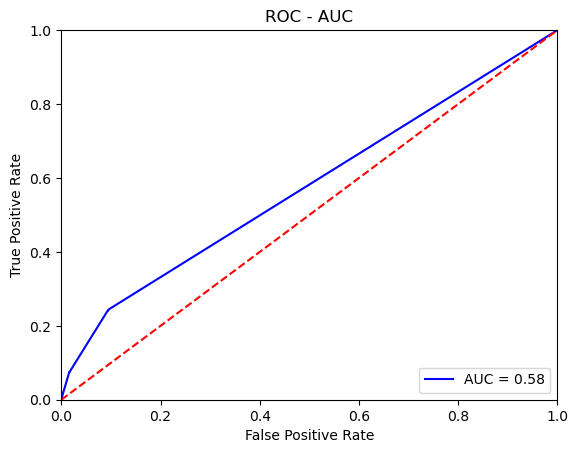

In [57]:
fpr, tpr, threshold = roc_curve(y_rf_10_train, rfc.predict_proba(X_rf_10_rain)[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('ROC - AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
y_pred = rfc.predict(X_rf_9_rain)
y_pred.astype(int)

array([1, 1, 1, ..., 0, 0, 0])

In [59]:
train_r_X = np.array([X_rf_9_rain[i] for i in range(X_rf_9_rain.shape[0]) if  y_pred[i] == 1])
train_r_y = np.array([y_rf_9_rgr[i] for i in range(X_rf_9_rain.shape[0]) if y_pred[i] == 1])

In [60]:
train_r_X.shape

(2520, 18)

In [61]:
train_r_y.shape

(2520,)

In [62]:
rfe = RandomForestRegressor(n_estimators = 8, random_state=42).fit(train_r_X, train_r_y)

In [63]:
mean_squared_error(y_rf_10_rgr, rfe.predict(X_rf_10_rain)) # mes_val random forest regression

45.83061294989252

In [80]:
mean_squared_error(y_rf_10_rgr,imerg_10)

11.994233955645315

# **SVM**

In [65]:
from sklearn.svm import SVC

In [66]:
classifier = SVC(kernel = 'rbf', random_state = 42, probability=True, class_weight = class_weight)
classifier.fit(X_rf_9_rain, y_rf_9_train)

SVC(class_weight={0: 1, 1: 20}, probability=True, random_state=42)

In [67]:
cm = confusion_matrix(y_rf_9_train, classifier.predict(X_rf_9_rain))
print(cm)
accuracy_score(y_rf_9_train, classifier.predict(X_rf_9_rain))

[[50234  6328]
 [  400  2212]]


0.8863014161625038

In [68]:
print(classification_report(y_rf_10_train, classifier.predict(X_rf_10_rain)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     46539
           1       0.27      0.35      0.30      2306

    accuracy                           0.92     48845
   macro avg       0.62      0.65      0.63     48845
weighted avg       0.93      0.92      0.93     48845



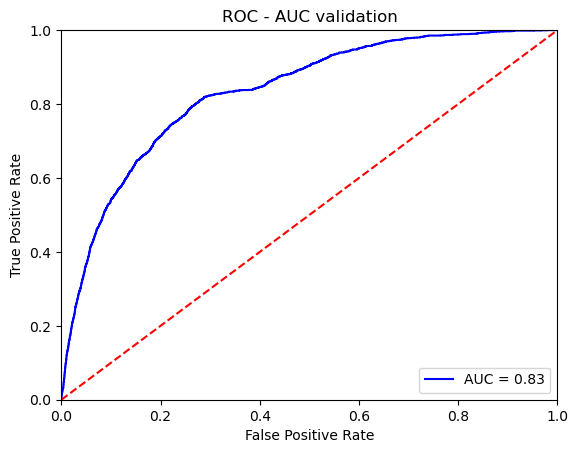

In [69]:
fpr, tpr, threshold = roc_curve(y_rf_10_train, classifier.predict_proba(X_rf_10_rain)[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('ROC - AUC validation')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
mean_squared_error(y_rf_10_train, classifier.predict(X_rf_10_rain)) # mse_val svm classifier

0.07556556454089466

In [71]:
from sklearn.svm import SVR

Lấy nhãn rain đã classification

In [74]:
y_rain_pred = classifier.predict(X_rf_9_rain)

In [75]:
y_pred = (y_rain_pred > 0.5).astype(np.int16)

In [76]:
x_regr = [X_rf_9_rain[i] for i in range(X_rf_9_rain.shape[0]) if y_pred[i] == 1]
y_regr = [y_rf_9_rgr[i] for i in range(X_rf_9_rain.shape[0]) if y_pred[i] == 1]

In [77]:
svr = SVR(kernel='rbf', C=1, epsilon=0.1)
svr.fit(x_regr,y_regr)

SVR(C=1)

In [78]:
mean_squared_error(y_rf_10_rgr, svr.predict(X_rf_10_rain)) # mes_val SVM regression

3.085312267018873

In [79]:
mean_squared_error(y_rf_10_rgr, imerg_10)

11.994233955645315